- <h1 style="background-color: #4DA733; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold;"> Dengue Cases Prediction Model Base on Weather Factors </h1>

In [2]:
import pandas as pd
import numpy as np

In [3]:
## Load dataset

dengue_data = pd.read_csv("Sri_lanka_dengue_cases_weather_weekly_2007_2024_.csv", parse_dates = ['Week_Start_Date', 'Week_End_Date'])


In [4]:
## Dengue Data
dengue_data.head()

,District,Number_of_Cases,Week_Start_Date,Month,Year,Week,Week_End_Date,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Total Rain (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Avg Daylight Duration (hours),Avg Sunrise Time,Avg Sunset Time
0,Ampara,0,2007-01-01,1,2007,1,2007-01-08,26.9375,21.8625,28.8500,24.1000,8.0,8.0,18.2000,44.3,3,11.714583,376,1079
1,Ampara,0,2007-01-08,1,2007,2,2007-01-15,26.3500,23.3250,30.2625,26.7000,86.1,86.1,17.0250,43.6,53,11.733333,378,1082
2,Ampara,0,2007-01-15,1,2007,3,2007-01-22,27.2125,23.1625,29.5750,25.9625,3.1,3.1,20.1875,48.2,51,11.754167,380,1085
3,Ampara,0,2007-01-22,1,2007,4,2007-01-29,26.7250,23.0375,29.9500,26.1125,53.6,53.6,17.2000,42.5,61,11.783333,381,1088
4,Ampara,0,2007-01-29,1,2007,5,2007-02-05,27.3625,22.9625,30.7500,26.1250,8.2,8.2,17.2625,40.0,51,11.812500,382,1090


In [7]:
dengue_data.shape

(22950, 19)

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Dataset columns descriptions and information
</span>

<h2 style="color:green">Check dataset info and null values</h2>

In [12]:
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   District                       22950 non-null  object        
 1   Number_of_Cases                22950 non-null  int64         
 2   Week_Start_Date                22950 non-null  datetime64[ns]
 3   Month                          22950 non-null  int64         
 4   Year                           22950 non-null  int64         
 5   Week                           22950 non-null  int64         
 6   Week_End_Date                  22950 non-null  datetime64[ns]
 7   Avg Max Temp (°C)              22950 non-null  float64       
 8   Avg Min Temp (°C)              22950 non-null  float64       
 9   Avg Apparent Max Temp (°C)     22950 non-null  float64       
 10  Avg Apparent Min Temp (°C)     22950 non-null  float64       
 11  Total Precipita

<h3 style="color:green">Dengue Dataset Column names description</h3>

1. `District` - The Administrative districts in Sri Lanka

2. `Number_of_Cases` - Dengue cases reported weekly 

3. `Week_Start_Date` - The Starting date for the reported cases

4. `Month` - The Month the cases were reported

5. `Year` - The Year the cases were reported

6. `Week` - The Week the cases were reported

7. `Week_End_Date` - The Ending date for the reported cases

8. `Avg Max Temp (°C)` - The Average maximum temperature measured in degree Celsius

9. `Avg Min Temp (°C)` - The Average minimum temperature measured in degree Celsius

10. `Avg Apparent Max Temp (°C)` - The Average Apparent maximum temperature measured in degree Celsius

11. `Avg Apparent Min Temp (°C)` - The Average Apparent minimum temperature measured in degree Celsius

12. `Total Precipitation (mm)` - The Total Precipitation measured in millimetres 

13. `Total Rain (mm)` - The Total Precipitation measured in millimetres

14. `Avg Wind Speed (km/h)` - The Average wind speed measured in kilometre per hour

15. `Max Wind Gusts (km/h)` - The Maximum wind gust speed measured in kilometre per hour

16. `Weather Code` - Code representing weather conditions

17. `Avg Daylight Duration (hours)` - The Average daylight duration measured in hours

18. `Avg Sunrise Time` - The Average Sunrise Time

19. `Avg Sunset Time` - The Average Sunset Time

<p><strong>The dataset has been checked for null values, and no missing or null values were found. All entries in the dataset are complete and properly populated.</strong></p>

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> DATA CLEANING PROCESS
</span>

<h2 style="color:green">Check correlation other features with Number_of_Cases</h2>

In [18]:
dengue_data.corr(numeric_only=True)["Number_of_Cases"]

Number_of_Cases                  1.000000
Month                            0.019516
Year                             0.186814
Week                             0.016326
Avg Max Temp (°C)               -0.034041
Avg Min Temp (°C)                0.026080
Avg Apparent Max Temp (°C)       0.008545
Avg Apparent Min Temp (°C)       0.058335
Total Precipitation (mm)         0.085528
Total Rain (mm)                  0.085528
Avg Wind Speed (km/h)           -0.013081
Max Wind Gusts (km/h)           -0.007809
Weather Code                     0.092491
Avg Daylight Duration (hours)    0.005430
Avg Sunrise Time                 0.049056
Avg Sunset Time                  0.050656
Name: Number_of_Cases, dtype: float64

<h2 style="color:green">Drop unnecessary columns</h2>

In [21]:
dengue_data.drop(columns=["Week_Start_Date", "Week_End_Date", "Avg Sunrise Time", "Avg Sunset Time", "Total Rain (mm)", "Avg Daylight Duration (hours)"], inplace=True)



In [23]:
dengue_data.head()

,District,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code
0,Ampara,0,1,2007,1,26.9375,21.8625,28.8500,24.1000,8.0,18.2000,44.3,3
1,Ampara,0,1,2007,2,26.3500,23.3250,30.2625,26.7000,86.1,17.0250,43.6,53
2,Ampara,0,1,2007,3,27.2125,23.1625,29.5750,25.9625,3.1,20.1875,48.2,51
3,Ampara,0,1,2007,4,26.7250,23.0375,29.9500,26.1125,53.6,17.2000,42.5,61
4,Ampara,0,1,2007,5,27.3625,22.9625,30.7500,26.1250,8.2,17.2625,40.0,51


<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Feature Engineering
</span>

<h2 style="color:green">Remove Outliers</h2>

In [27]:
num_cols = dengue_data.select_dtypes(include=["number"]).columns

In [29]:
# Outlier detection using the IQR method

outlier_counts = {}
total_rows = dengue_data.shape[0]

for col in num_cols:
    Q1 = dengue_data[col].quantile(0.25)
    Q3 = dengue_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    
    outlier_count = ((dengue_data[col] < lower_bound) | (dengue_data[col] > upper_bound)).sum()
    outlier_counts[col] = outlier_count

In [31]:
# Convert outlier stats to DataFrame for better readability

outlier_stats = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_stats['Outlier Percentage'] = (outlier_stats['Outlier Count'] / total_rows) * 100

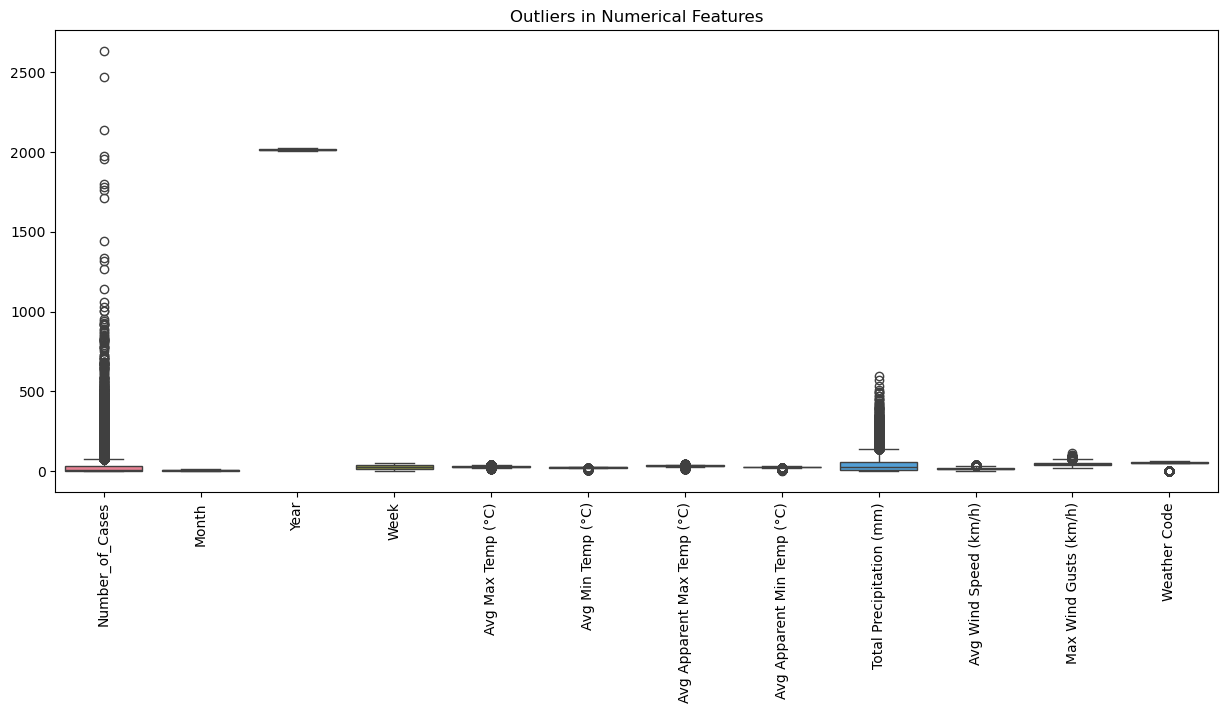

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(data=dengue_data.select_dtypes(include=["number"]))
plt.xticks(rotation=90)
plt.title("Outliers in Numerical Features")
plt.show()

In [34]:
# Return sorted outlier stats

outlier_stats.sort_values(by="Outlier Count", ascending=False)

,Outlier Count,Outlier Percentage
Weather Code,5295,23.071895
Number_of_Cases,2572,11.206972
Avg Apparent Min Temp (°C),1177,5.128540
Total Precipitation (mm),1164,5.071895
Avg Max Temp (°C),1062,4.627451
Avg Min Temp (°C),1056,4.601307
Avg Apparent Max Temp (°C),953,4.152505
Avg Wind Speed (km/h),388,1.690632
Max Wind Gusts (km/h),291,1.267974
Month,0,0.000000


<h3 style="color:green">Summary of Outliers</h3>
<ul>
  <li><strong>Weather Code</strong> has the highest number of outliers: 5295 instances (23.07%)</li>
  <li><strong>Number of Dengue Cases</strong> has 2572 outliers (11.21%)</li>
  <li><strong>Avg Apparent Min Temp</strong>, <strong>Total Precipitation</strong>, and <strong>Avg Max Temp</strong> also show significant outliers (~4-5%)</li>
  <li><strong>Wind-related features</strong> (Avg Wind Speed & Max Wind Gusts) have fewer outliers (~1-2%)</li>
  <li><strong>Month</strong>, <strong>Year</strong>, <strong>Week</strong>, and <strong>Avg Daylight Duration</strong> have no outliers</li>
</ul>


<h3 style="color:green">Cap outliers at the 99th percentile</h3>

In [39]:
# Cap outliers at the 99th percentile for selected features

features_to_cap = ["Number_of_Cases", "Avg Max Temp (°C)", "Avg Min Temp (°C)", 
                   "Avg Apparent Max Temp (°C)", "Avg Apparent Min Temp (°C)", 
                   "Total Precipitation (mm)", "Avg Wind Speed (km/h)", "Max Wind Gusts (km/h)"]

In [41]:
# Apply capping (winsorization) at 99th percentile

for col in features_to_cap:
    upper_limit = dengue_data[col].quantile(0.99)  # 99th percentile cap
    dengue_data[col] = np.where(dengue_data[col] > upper_limit, upper_limit, dengue_data[col])

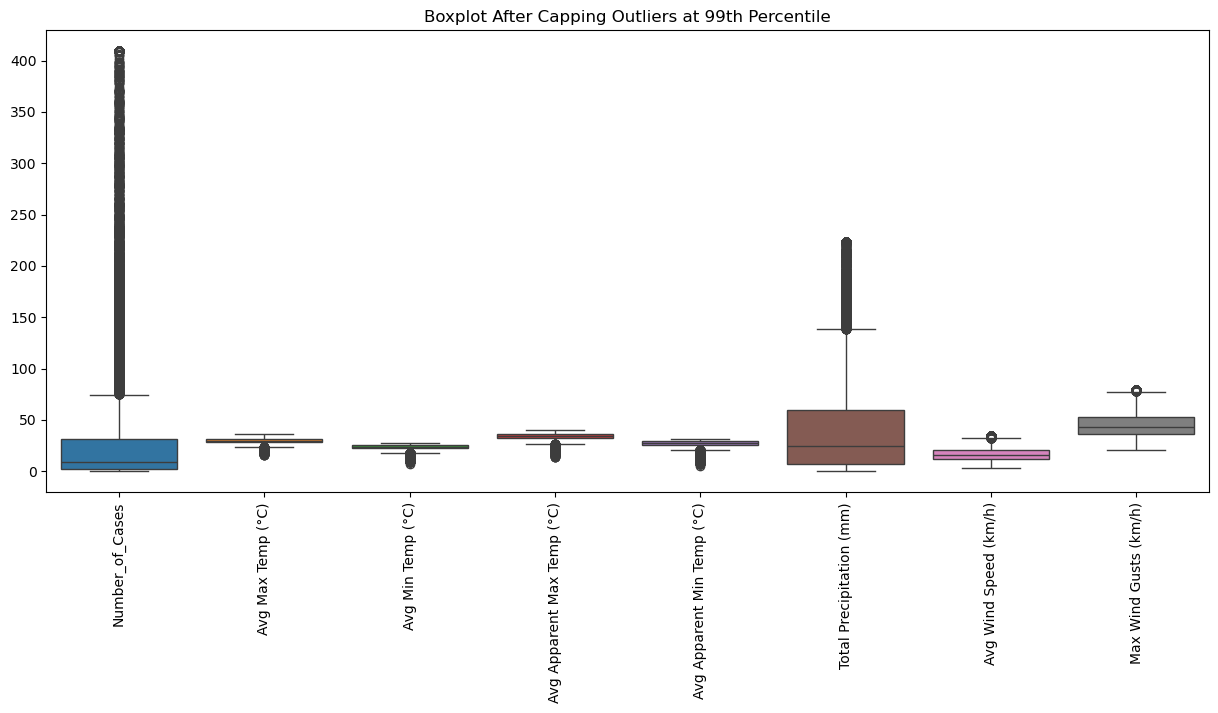

In [43]:
# Re-visualize after capping

plt.figure(figsize=(15, 6))
sns.boxplot(data=dengue_data[features_to_cap])
plt.xticks(rotation=90)
plt.title("Boxplot After Capping Outliers at 99th Percentile")
plt.show()


In [45]:
# Check how many outliers remain after capping

outlier_counts_after = {}

for col in features_to_cap:
    Q1 = dengue_data[col].quantile(0.25)
    Q3 = dengue_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers after capping
    outlier_count = ((dengue_data[col] < lower_bound) | (dengue_data[col] > upper_bound)).sum()
    outlier_counts_after[col] = outlier_count


# Convert to DataFrame for readability
outlier_stats_after = pd.DataFrame.from_dict(outlier_counts_after, orient='index', columns=['Remaining Outliers'])

# Return outlier stats after capping
outlier_stats_after.sort_values(by="Remaining Outliers", ascending=False)

,Remaining Outliers
Number_of_Cases,2572
Avg Apparent Min Temp (°C),1177
Total Precipitation (mm),1164
Avg Min Temp (°C),1056
Avg Apparent Max Temp (°C),931
Avg Max Temp (°C),918
Avg Wind Speed (km/h),388
Max Wind Gusts (km/h),291


<h3 style="color:green">Outliers After Capping</h3>
<ul>
  <li>The extreme outliers have been reduced, but some still remain because capping only adjusts the highest values.</li>
  <li><strong>Dengue Cases</strong> (2,572 outliers) still show high variability this may indicate real seasonal spikes rather than errors.</li>
  <li><strong>Temperature</strong> and <strong>precipitation</strong> features have around 900–1,100 remaining outliers, suggesting some natural fluctuations.</li>
  <li><strong>Wind-related features</strong> now have much fewer outliers (~300), making them more stable.</li>
</ul>


<h2 style="color:green">Lag Features</h2>

In [49]:
## Create Lag feature

dengue_data.sort_values(by=["District", "Year", "Week"], inplace=True)
dengue_data["Cases_Last_Week"] = dengue_data.groupby("District")["Number_of_Cases"].shift(1)
dengue_data["Cases_Last_2_Weeks"] = dengue_data.groupby("District")["Number_of_Cases"].shift(2)

In [52]:
dengue_data.tail(50)

,District,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Cases_Last_Week,Cases_Last_2_Weeks
22900,Vavuniya,2.0,8,2023,33,35.4750,25.0375,37.8375,27.7125,2.2,21.5500,55.8,2,2.0,4.0
22901,Vavuniya,2.0,8,2023,34,35.9625,25.2375,39.6875,28.6125,7.6,19.0625,46.8,1,2.0,2.0
22902,Vavuniya,1.0,8,2023,35,34.2250,24.9000,37.9125,28.0375,48.6,22.0250,55.8,53,2.0,2.0
22903,Vavuniya,1.0,9,2023,36,32.8375,24.5625,35.0750,26.9875,13.3,27.5250,64.1,51,1.0,2.0
22904,Vavuniya,1.0,9,2023,37,34.0375,25.0750,37.1875,27.7875,20.3,23.9375,55.4,53,1.0,1.0
22905,Vavuniya,1.0,9,2023,38,34.0125,24.5375,37.6625,27.6000,35.7,20.9125,51.8,51,1.0,1.0
22906,Vavuniya,1.0,9,2023,39,32.7750,24.7875,35.8125,27.7625,26.0,24.4000,59.0,63,1.0,1.0
22907,Vavuniya,1.0,10,2023,40,33.2250,24.3250,37.9250,27.8750,79.1,19.7625,55.4,63,1.0,1.0
22908,Vavuniya,2.0,10,2023,41,31.6625,23.5375,37.2625,27.5875,114.7,14.7625,42.8,63,1.0,1.0
22909,Vavuniya,4.0,10,2023,42,31.0125,23.1750,36.4750,27.2250,143.5,11.3375,31.0,65,2.0,1.0



<ul>
  <li><strong>Cases_Last_Week</strong>: Adds a new column with dengue cases from one week before for each district.</li>
  <li><strong>Cases_Last_2_Weeks</strong>: Adds another column with dengue cases from two weeks before.</li>
</ul>


In [55]:
## Moving Averages (Trend-Based Features)

dengue_data["Cases_3_Week_Avg"] = (
    dengue_data.groupby("District")["Number_of_Cases"]
    .shift(1)  # Shift first to exclude the current week
    .rolling(window=3)  # Take the last 3 weeks
    .mean()
)

dengue_data["Cases_5_Week_Avg"] = (
    dengue_data.groupby("District")["Number_of_Cases"]
    .shift(1)  # Exclude the current week
    .rolling(window=5)  # Take the last 5 weeks
    .mean()
)

<ul>
  <li>Computes the average number of dengue cases over 3-week and 5-week windows.</li>
  <ul>
    <li><strong>Smooths out weekly fluctuations.</strong></li>
    <li><strong>Helps the model understand short-term trends</strong> in dengue cases.</li>
  </ul>
</ul>

In [58]:
dengue_data.tail(50)

,District,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Cases_Last_Week,Cases_Last_2_Weeks,Cases_3_Week_Avg,Cases_5_Week_Avg
22900,Vavuniya,2.0,8,2023,33,35.4750,25.0375,37.8375,27.7125,2.2,21.5500,55.8,2,2.0,4.0,3.333333,2.6
22901,Vavuniya,2.0,8,2023,34,35.9625,25.2375,39.6875,28.6125,7.6,19.0625,46.8,1,2.0,2.0,2.666667,2.8
22902,Vavuniya,1.0,8,2023,35,34.2250,24.9000,37.9125,28.0375,48.6,22.0250,55.8,53,2.0,2.0,2.000000,2.8
22903,Vavuniya,1.0,9,2023,36,32.8375,24.5625,35.0750,26.9875,13.3,27.5250,64.1,51,1.0,2.0,1.666667,2.2
22904,Vavuniya,1.0,9,2023,37,34.0375,25.0750,37.1875,27.7875,20.3,23.9375,55.4,53,1.0,1.0,1.333333,1.6
22905,Vavuniya,1.0,9,2023,38,34.0125,24.5375,37.6625,27.6000,35.7,20.9125,51.8,51,1.0,1.0,1.000000,1.4
22906,Vavuniya,1.0,9,2023,39,32.7750,24.7875,35.8125,27.7625,26.0,24.4000,59.0,63,1.0,1.0,1.000000,1.2
22907,Vavuniya,1.0,10,2023,40,33.2250,24.3250,37.9250,27.8750,79.1,19.7625,55.4,63,1.0,1.0,1.000000,1.0
22908,Vavuniya,2.0,10,2023,41,31.6625,23.5375,37.2625,27.5875,114.7,14.7625,42.8,63,1.0,1.0,1.000000,1.0
22909,Vavuniya,4.0,10,2023,42,31.0125,23.1750,36.4750,27.2250,143.5,11.3375,31.0,65,2.0,1.0,1.333333,1.2


In [59]:
## Difference from Last Week (Trend Detection)

dengue_data["Cases_Diff_1_Week"] = dengue_data["Number_of_Cases"] - dengue_data["Cases_Last_Week"]

<ul>
  <li>Calculates the change in cases from last week.</li>
  <ul>
    <li><strong>Helps the model understand week-over-week increases or decreases</strong> in cases.</li>
  </ul>
</ul>

In [63]:
# Drop NaN Values

dengue_data.dropna(inplace=True)

<ul>
  <li>Lag features introduce NaN values for the first week (since there’s no "previous week" data).</li>
  <li>Moving averages also introduce NaNs for the first few weeks.</li>
</ul>

In [66]:
dengue_data.tail(100)

,District,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Cases_Last_Week,Cases_Last_2_Weeks,Cases_3_Week_Avg,Cases_5_Week_Avg,Cases_Diff_1_Week
22850,Vavuniya,1.0,9,2022,36,31.4750,24.4625,34.2750,26.6250,4.7,26.7875,60.8,3,1.0,2.0,1.666667,1.6,0.0
22851,Vavuniya,1.0,9,2022,37,33.3875,24.1250,36.9375,27.0000,1.2,22.3125,53.6,51,1.0,1.0,1.333333,1.4,0.0
22852,Vavuniya,1.0,9,2022,38,34.7500,24.6125,37.7125,27.5625,14.7,19.7250,49.3,1,1.0,1.0,1.000000,1.4,0.0
22853,Vavuniya,2.0,9,2022,39,33.6000,24.4125,36.9250,27.2500,23.2,21.9500,64.8,51,1.0,1.0,1.000000,1.2,1.0
22854,Vavuniya,3.0,10,2022,40,32.6625,24.1250,36.3500,27.5125,69.4,17.5750,44.6,63,2.0,1.0,1.333333,1.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,Vavuniya,3.0,6,2024,25,32.6500,25.6375,35.5500,28.4000,5.7,27.3125,64.4,51,3.0,3.0,2.333333,1.8,0.0
22946,Vavuniya,3.0,6,2024,26,33.0750,25.6500,35.5250,28.3500,3.5,26.9375,68.4,51,3.0,3.0,3.000000,2.2,0.0
22947,Vavuniya,2.0,7,2024,27,34.1625,25.6750,37.0125,28.7750,4.1,23.6125,53.3,51,3.0,3.0,3.000000,2.6,-1.0
22948,Vavuniya,1.0,7,2024,28,34.0125,25.8000,36.8125,28.6375,8.0,24.4500,62.6,51,2.0,3.0,2.666667,2.8,-1.0


<h2 style="color:green">OneHotEncoding - District</h2>

In [69]:
dengue_data = pd.get_dummies(dengue_data, columns=["District"], drop_first=True)

In [71]:
dengue_data.head()

,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),...,District_Matale,District_Matara,District_Monaragala,District_Mullaitivu,District_NuwaraEliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya
4,0.0,1,2007,5,27.3625,22.9625,30.7500,26.1250,8.2,17.2625,...,False,False,False,False,False,False,False,False,False,False
5,0.0,2,2007,6,27.8625,21.7750,31.8875,25.2625,10.3,15.0250,...,False,False,False,False,False,False,False,False,False,False
6,0.0,2,2007,7,29.0000,23.4750,34.2375,27.5750,5.3,11.9500,...,False,False,False,False,False,False,False,False,False,False
7,0.0,2,2007,8,27.9375,23.3000,30.7750,26.4125,8.4,18.4000,...,False,False,False,False,False,False,False,False,False,False
8,1.0,2,2007,9,29.2875,22.8250,34.5875,26.8500,3.9,13.4750,...,False,False,False,False,False,False,False,False,False,False


<h2 style="color:green">Scale numerical features, including Wind & Gusts</h2>

In [1201]:
from sklearn.preprocessing import StandardScaler

In [1203]:
scaler = StandardScaler()
num_cols = dengue_data.select_dtypes(include=["number"]).columns.difference(["Number_of_Cases"])
dengue_data[num_cols] = scaler.fit_transform(dengue_data[num_cols])

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Model Building
</span>

<h2 style="color:green">Define features and target</h2>

In [75]:
X = dengue_data.drop(columns=["Number_of_Cases"])
y = dengue_data["Number_of_Cases"]

<h2 style="color:green">Split dataset</h2>

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<h2 style="color:green">Method for multiple algorithm</h2>

In [83]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model) + "--->" + str(acc))

<h2 style="color:green">Multiple algorithm</h2>

<h3 style="color:green">Linear regression model</h3>

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

LinearRegression()--->1.0


<h3 style="color:green">Lasso Model</h3>

In [89]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

Lasso()--->0.999999117582217


<h3 style="color:green">Decision Tree</h3>

In [93]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

DecisionTreeRegressor()--->0.9947095564925106


<h3 style="color:green">Random Forest</h3>

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

RandomForestRegressor()--->0.9984921298155365


<h3 style="color:green">XGBoost</h3>

In [98]:
!pip install xgboost

In [99]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model_acc(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)--->0.9949445909061282


<h2 style="color:green">Train the Model Using the Selected Algorithm</h2>

In [101]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept': [True, False]}

grid_obj = GridSearchCV(estimator=lr, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_
best_model

LinearRegression()

<h3 style="color:green">Predictions</h3>

In [103]:
y_pred = best_model.predict(X_test)

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Evaluate performance 
</span>

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.5313959457507054e-13
Mean Squared Error: 1.1234778868497986e-25
R-squared: 1.0


In [107]:
print("Feature columns used in the model:")
print(X.columns)

Feature columns used in the model:
Index(['Month', 'Year', 'Week', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)',
       'Avg Apparent Max Temp (°C)', 'Avg Apparent Min Temp (°C)',
       'Total Precipitation (mm)', 'Avg Wind Speed (km/h)',
       'Max Wind Gusts (km/h)', 'Weather Code', 'Cases_Last_Week',
       'Cases_Last_2_Weeks', 'Cases_3_Week_Avg', 'Cases_5_Week_Avg',
       'Cases_Diff_1_Week', 'District_Anuradhapura', 'District_Badulla',
       'District_Batticaloa', 'District_Colombo', 'District_Galle',
       'District_Gampaha', 'District_Hambantota', 'District_Jaffna',
       'District_Kalutara', 'District_Kandy', 'District_Kegalle',
       'District_Kilinochchi', 'District_Kurunegala', 'District_Mannar',
       'District_Matale', 'District_Matara', 'District_Monaragala',
       'District_Mullaitivu', 'District_NuwaraEliya', 'District_Polonnaruwa',
       'District_Puttalam', 'District_Ratnapura', 'District_Trincomalee',
       'District_Vavuniya'],
      dtype='object')


<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Test Model
</span>

In [109]:
dengue_data.head()

,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),...,District_Matale,District_Matara,District_Monaragala,District_Mullaitivu,District_NuwaraEliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya
4,0.0,1,2007,5,27.3625,22.9625,30.7500,26.1250,8.2,17.2625,...,False,False,False,False,False,False,False,False,False,False
5,0.0,2,2007,6,27.8625,21.7750,31.8875,25.2625,10.3,15.0250,...,False,False,False,False,False,False,False,False,False,False
6,0.0,2,2007,7,29.0000,23.4750,34.2375,27.5750,5.3,11.9500,...,False,False,False,False,False,False,False,False,False,False
7,0.0,2,2007,8,27.9375,23.3000,30.7750,26.4125,8.4,18.4000,...,False,False,False,False,False,False,False,False,False,False
8,1.0,2,2007,9,29.2875,22.8250,34.5875,26.8500,3.9,13.4750,...,False,False,False,False,False,False,False,False,False,False


In [110]:
def predict_cases(district, Month, Year, Week, AvgMaxTemp ,AvgMinTemp, AvgApparentMaxTemp, AvgApparentMinTemp, TotalPrecipitation, AvgWindSpeed, MaxWindGusts, WeatherCode, Cases_Last_Week, Cases_Last_2_Weeks, Cases_3_Week_Avg, Cases_5_Week_Avg, Cases_Diff_1_Week):
    loc_index = np.where(X.columns==district)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Month
    x[1] = Year
    x[2] = Week
    x[3] = AvgMaxTemp
    x[4] = AvgMinTemp
    x[5] = AvgApparentMaxTemp
    x[6] = AvgApparentMinTemp
    x[7] = TotalPrecipitation
    x[8] = AvgWindSpeed
    x[9] = MaxWindGusts
    x[10] = WeatherCode
    x[11] = Cases_Last_Week
    x[12] = Cases_Last_2_Weeks
    x[13] = Cases_3_Week_Avg
    x[14] = Cases_5_Week_Avg
    x[15] = Cases_Diff_1_Week
    if loc_index >= 0:
        x[loc_index] = 1

    return best_model.predict([x])[0]




In [111]:
predict_cases("District_Colombo", 1, 2025, 8, 28, 26, 28, 22, 10, 28, 25, 51, 300, 269, 247, 230, 41)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


341.0000000000005

In [113]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent column wrapping
colombo_encoded_data = dengue_data[dengue_data["District_Colombo"] == 1]
colombo_encoded_data

colombo_encoded_data.head(913) # Display all columns of filtered Colombo data

,Number_of_Cases,Month,Year,Week,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Cases_Last_Week,Cases_Last_2_Weeks,Cases_3_Week_Avg,Cases_5_Week_Avg,Cases_Diff_1_Week,District_Anuradhapura,District_Badulla,District_Batticaloa,District_Colombo,District_Galle,District_Gampaha,District_Hambantota,District_Jaffna,District_Kalutara,District_Kandy,District_Kegalle,District_Kilinochchi,District_Kurunegala,District_Mannar,District_Matale,District_Matara,District_Monaragala,District_Mullaitivu,District_NuwaraEliya,District_Polonnaruwa,District_Puttalam,District_Ratnapura,District_Trincomalee,District_Vavuniya
3676,69.0,1,2007,5,31.6750,23.0125,36.3625,26.3750,4.400,10.6250,30.2,2,52.0,38.0,44.333333,44.4,17.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3677,36.0,2,2007,6,32.2375,22.9000,36.3875,26.8750,3.400,11.6125,37.8,51,69.0,52.0,53.000000,50.2,-33.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3678,42.0,2,2007,7,31.4125,24.1000,36.2500,28.7375,3.900,11.8375,31.3,51,36.0,69.0,52.333333,47.6,6.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3679,28.0,2,2007,8,32.3625,23.8125,35.7000,26.4625,4.500,12.8625,38.5,2,42.0,36.0,49.000000,47.4,-14.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3680,20.0,2,2007,9,32.1250,24.1000,37.6250,28.6625,21.600,10.9000,32.4,63,28.0,42.0,35.333333,45.4,-8.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3681,19.0,3,2007,10,32.6875,24.6375,37.2750,29.2500,3.200,12.3000,34.6,51,20.0,28.0,30.000000,39.0,-1.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3682,11.0,3,2007,11,31.5875,24.4125,38.7500,29.5125,50.600,9.8625,30.6,51,19.0,20.0,22.333333,29.0,-8.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3683,11.0,3,2007,12,31.9250,24.0625,37.3625,28.7625,2.500,13.3875,32.4,51,11.0,19.0,16.666667,24.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3684,3.0,3,2007,13,32.6125,24.9500,38.0875,29.6250,27.400,12.8000,35.3,51,11.0,11.0,13.666667,17.8,-8.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3685,10.0,4,2007,14,30.4625,24.6500,37.2375,29.5500,192.900,10.0250,27.4,63,3.0,11.0,8.333333,12.8,7.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> Export Model
</span>

In [127]:
import pickle
with open("dengue_case_prediction_model.pickle", "wb") as file:
    pickle.dump(best_model, file)

In [129]:
# Save feature names (column order matters for one-hot encoding)

with open("columns.pickle", "wb") as file:
    pickle.dump(X.columns.tolist(), file)